In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [230]:
pd.set_option('display.max_columns', None)

In [231]:
# read in player_stats_with_network.parquet
ncaa_players = pd.read_parquet('player_stats_with_network.parquet')

ncaa_players.head()

,role,number,player,ht,wt,yr,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,category,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,group_rank,team,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,transfer,prev_team,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,team_display_name
0,Major Contributor,2.0,Julian Champagnie,6-8,215.0,Jr,31.0,82.5,105.4,25.5,30.3,47.5,50.7,4.1,10.9,10.9,9.2,3.5,3.1,1.8,4.0,21.4,89.0,114.0,0.781,156.0,341.0,0.457,65.0,193.0,0.337,All Games,19.0,NaN,299.0,8.0,NaN,NaN,NaN,NaN,NaN,45.0,302.0,169.0,11.0,NaN,NaN,406.0,NaN,NaN,National Rank,St. John's,2022,45689.0,7.7,-5.6,-0.4,0.9,-3.7,-5.7,-1.2,3.0,3.0,-2.8,0.3,0.7,-0.3,-0.6,-8.6,-0.106,-0.014,-0.043,False,St. John's,1.297371,3.729506,5.026877,24.906250,797.0,34.218750,1095.0,32.0,32.0,2599.0,St. John's Red Storm
1,Significant Contributor,0.0,Posh Alexander,6-0,200.0,So,29.0,71.8,113.4,23.2,20.0,52.0,55.7,8.5,29.0,29.3,17.5,0.6,3.9,2.1,4.1,35.2,80.0,108.0,0.741,140.0,247.0,0.567,13.0,60.0,0.217,All Games,NaN,348.0,NaN,NaN,NaN,466.0,333.0,NaN,8.0,NaN,NaN,44.0,27.0,49.0,381.0,NaN,316.0,NaN,National Rank,St. John's,2022,49928.0,0.8,9.8,2.9,0.8,2.4,3.7,3.5,5.0,5.2,-2.4,0.5,-0.6,-0.8,1.3,13.8,0.016,0.052,-0.082,False,St. John's,1.105729,3.283223,4.388952,23.966667,719.0,32.000000,960.0,26.0,30.0,2599.0,St. John's Red Storm
2,Significant Contributor,5.0,Dylan AddaeWusu,6-4,235.0,So,32.0,61.0,101.5,20.3,17.3,51.1,52.6,3.9,25.5,25.5,22.6,0.9,2.8,3.6,3.3,29.2,40.0,66.0,0.606,60.0,129.0,0.465,37.0,97.0,0.381,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.0,NaN,NaN,267.0,NaN,NaN,NaN,NaN,NaN,321.0,National Rank,St. John's,2022,50232.0,10.9,6.3,0.3,0.6,1.1,0.6,-1.5,6.5,5.8,-3.0,0.3,0.6,-1.7,0.1,-3.0,-0.011,-0.098,0.110,False,St. John's,0.495921,2.298377,2.794298,15.575758,514.0,25.090909,828.0,16.0,33.0,2599.0,St. John's Red Storm
3,Role Player,23.0,Montez Mathis,6-4,210.0,Sr,32.0,60.5,98.3,18.5,18.9,44.9,47.3,4.5,12.6,12.6,14.2,0.8,2.4,3.7,3.3,28.2,43.0,69.0,0.623,89.0,192.0,0.464,14.0,53.0,0.264,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National Rank,St. John's,2022,42323.0,8.1,6.7,-5.2,-6.7,1.7,1.9,-0.9,5.4,5.4,1.6,-0.7,0.5,-0.8,-0.9,-2.4,0.049,0.038,-0.033,True,Rutgers,0.831166,2.265116,3.096283,13.937500,446.0,24.468750,783.0,28.0,32.0,2599.0,St. John's Red Storm
4,Role Player,1.0,Aaron Wheeler,6-9,205.0,Sr,31.0,53.0,110.1,19.7,21.4,56.8,57.9,4.2,11.3,11.3,14.8,4.7,1.3,4.2,3.1,22.2,35.0,54.0,0.648,75.0,134.0,0.560,42.0,109.0,0.385,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,356.0,284.0,National Rank,St. John's,2022,40047.0,7.5,13.1,5.7,7.6,9.3,9.2,-1.5,1.1,1.1,-6.9,1.4,-0.7,0.1,0.8,-0.8,0.083,-0.051,0.119,True,Purdue,0.685434,1.934768,2.620202,13.500000,405.0,22.733333,682.0,16.0,30.0,2599.0,St. John's Red Storm


In [232]:
# view all columns in the dataset
ncaa_players.columns

Index(['role', 'number', 'player', 'ht', 'wt', 'yr', 'g', 'min_pct', 'o_rtg',
       'poss_pct', 'shots_pct', 'e_fg_pct', 'ts_pct', 'or_pct', 'dr_pct',
       'a_rate', 'to_rate', 'blk_pct', 'stl_pct', 'f_cper40', 'f_dper40',
       'ft_rate', 'ftm', 'fta', 'ft_pct', 'fgm_2', 'fga_2', 'fg_2_pct',
       'fgm_3', 'fga_3', 'fg_3_pct', 'category', 'min_pct_rk', 'o_rtg_rk',
       'poss_pct_rk', 'shots_pct_rk', 'e_fg_pct_rk', 'ts_pct_rk', 'or_pct_rk',
       'dr_pct_rk', 'a_rate_rk', 'to_rate_rk', 'blk_pct_rk', 'stl_pct_rk',
       'f_cper40_rk', 'f_dper40_rk', 'ft_rate_rk', 'ft_pct_rk', 'fg_2_pct_rk',
       'fg_3_pct_rk', 'group_rank', 'team', 'year', 'player_id',
       'diff_min_pct', 'diff_o_rtg', 'diff_poss_pct', 'diff_shots_pct',
       'diff_e_fg_pct', 'diff_ts_pct', 'diff_or_pct', 'diff_dr_pct',
       'diff_a_rate', 'diff_to_rate', 'diff_blk_pct', 'diff_stl_pct',
       'diff_f_cper40', 'diff_f_dper40', 'diff_ft_rate', 'diff_ft_pct',
       'diff_fg_2_pct', 'diff_fg_3_pct', 'tran

In [233]:
# drop unneccessary columns
new_df = ncaa_players.drop(columns =['role', 'number', 'player', 'ht', 'wt', 'yr', 'g', 'min_pct', 'o_rtg',
       'shots_pct', 'e_fg_pct', 'or_pct', 'dr_pct',
       'to_rate', 'blk_pct', 'stl_pct', 'f_cper40', 'f_dper40',
       'ft_rate', 'ftm', 'fta', 'ft_pct', 'fgm_2', 'fga_2', 'fg_2_pct',
       'fgm_3', 'fga_3', 'fg_3_pct', 'category', 'min_pct_rk', 'o_rtg_rk',
       'poss_pct_rk', 'shots_pct_rk', 'e_fg_pct_rk', 'ts_pct_rk', 'or_pct_rk',
       'dr_pct_rk', 'a_rate_rk', 'to_rate_rk', 'blk_pct_rk', 'stl_pct_rk',
       'f_cper40_rk', 'f_dper40_rk', 'ft_rate_rk', 'ft_pct_rk', 'fg_2_pct_rk',
       'fg_3_pct_rk', 'group_rank', 'team', 'year',
       'diff_min_pct', 'diff_o_rtg', 'diff_poss_pct', 'diff_shots_pct',
       'diff_e_fg_pct', 'diff_ts_pct', 'diff_or_pct', 'diff_dr_pct',
       'diff_a_rate', 'diff_to_rate', 'diff_blk_pct', 'diff_stl_pct',
       'diff_f_cper40', 'diff_f_dper40', 'diff_ft_rate', 'diff_ft_pct',
       'diff_fg_2_pct', 'diff_fg_3_pct', 'transfer', 'prev_team', 'total_possessions',
       'total_minutes', 'total_starts', 'total_games',
       'team_id', 'team_display_name', 'poss_pct','ts_pct','a_rate'])


In [234]:
# set player_id as the index and fill N/As with 0
new_df.set_index('player_id', inplace = True)
new_df.fillna(0, inplace = True)

In [235]:
new_df.head()

,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,avg_minutes
player_id,,,,,
45689.0,1.297371,3.729506,5.026877,24.906250,34.218750
49928.0,1.105729,3.283223,4.388952,23.966667,32.000000
50232.0,0.495921,2.298377,2.794298,15.575758,25.090909
42323.0,0.831166,2.265116,3.096283,13.937500,24.468750
40047.0,0.685434,1.934768,2.620202,13.500000,22.733333


In [236]:
# scale the dataset using StandardScaler
scaled_players = StandardScaler().fit_transform(new_df)
scaled_players

array([[-0.03589158,  0.94118741,  0.42614154,  2.3750975 ,  1.52860486],
       [-0.11209158,  0.74059618,  0.29047085,  2.23948572,  1.30563034],
       [-0.35456085,  0.29793658, -0.04867198,  1.02841048,  0.61129741],
       ...,
       [ 1.57155758,  1.61275895,  1.60369193,  0.94531034,  1.46123637],
       [ 1.5502743 ,  1.53827068,  1.55706263,  0.53559419,  2.106353  ],
       [-0.55174699, -0.73511754, -0.64294934, -1.21966706, -1.91022745]],
      shape=(16884, 5))

In [237]:
# fit PCA model on scaled dataset
pca = PCA(n_components = 3, random_state=0).fit(scaled_players)

In [238]:
# the 3 Principal Components explain 98.96% of tthe variance found in the dataset
print(pca.explained_variance_ratio_ * 100)
print(f'Total Explained Variance: {sum(pca.explained_variance_ratio_ * 100):.2f}%')

[73.91160812 20.44778367  5.48394609]
Total Explained Variance: 99.84%


In [239]:
# plot heatmap of the principal component loadings
def plot_PCA(pca):
    feature_list = list(new_df.columns)

    pc_names = []

    for i in range(1,4):
        pc_names.append(f'PC{i}')

    fig, ax = plt.subplots(figsize=(10,15))

    plt.imshow(pca.components_, interpolation='none', cmap='plasma')
    plt.xticks(np.arange(0, len(feature_list), 1), feature_list, rotation = 90, fontsize = 10)
    plt.yticks(np.arange(0,3,1), pc_names, fontsize = 10)
    plt.tight_layout()
    plt.title("Principal Component Loadings for NCAA Men's Basketball")
    plt.colorbar(shrink = .25)
    return

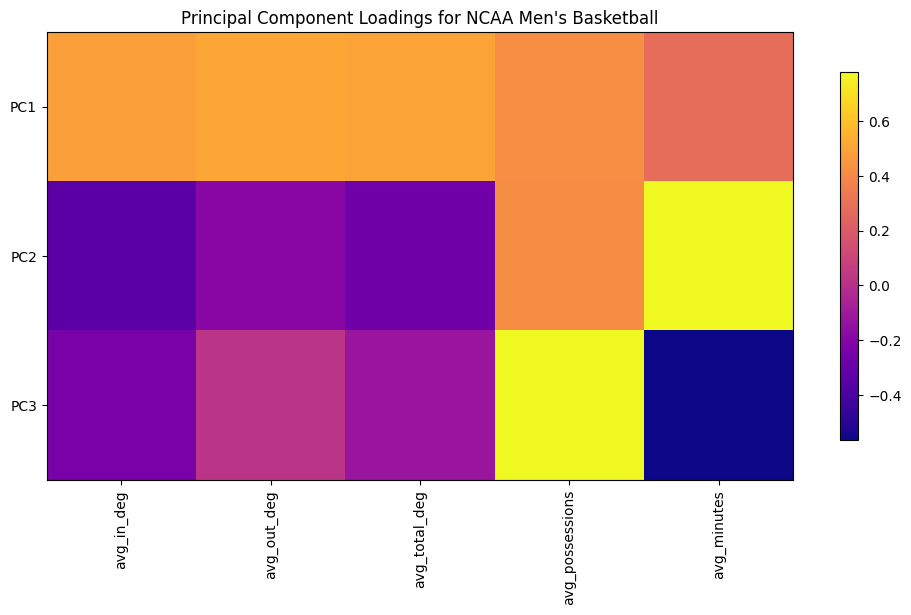

In [240]:
plot_PCA(pca)

In [241]:
# describe the most important features for each principal component
for ind, feat in enumerate(abs(pca.components_), start = 1):
    x = max(feat)
    max_index = list(feat).index(x)

    print(f'Most important feature for PC{ind}: {list(new_df.columns)[max_index]} - {x * 100:.2f}% of component explained')

Most important feature for PC1: avg_out_deg - 50.99% of component explained
Most important feature for PC2: avg_minutes - 77.54% of component explained
Most important feature for PC3: avg_possessions - 77.86% of component explained


In [242]:
# fit & transform dataset using the PCA model
pca_data = PCA(n_components = 3, random_state=0).fit_transform(scaled_players)
pca_data

array([[ 2.11095263,  1.89540824,  0.9650383 ],
       [ 1.78370289,  1.76617339,  1.01601702],
       [ 0.56395894,  0.98175436,  0.5557654 ],
       ...,
       [ 3.19406511,  0.25218167, -0.63423798],
       [ 3.13304   ,  0.61587267, -1.30773047],
       [-2.01860094, -1.48791341,  0.32528603]], shape=(16884, 3))

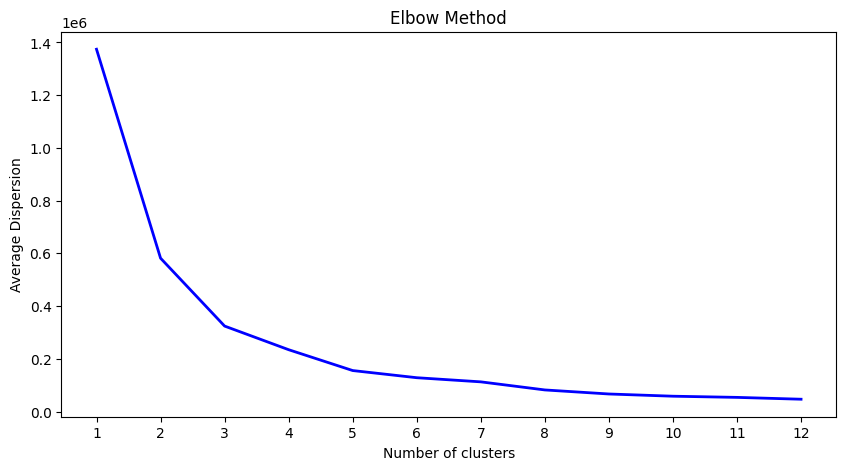

In [243]:
# use elbow method to select the number of clusters to use for KMeans clustering
avg_dis = []
for i in range(1, 13):
    k = KMeans(n_clusters=i, init = 'k-means++', random_state=0)
    k.fit(new_df.iloc[:,:-1])
    avg_dis.append(k.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,13), avg_dis, linewidth = 2, color = 'blue')
plt.xticks(np.arange(1,13,1))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Average Dispersion')
plt.show()

In [244]:
# create KMeans clustering model 
kmeans = KMeans(n_clusters = 5, max_iter = 1000,init ='k-means++', random_state = 0)
clusters = kmeans.fit_predict(pca_data)

In [245]:
# describe model performance using Silhouette Score, Davies-Bouldin Score, and Calinski-Harabasz Score
sil_avg = silhouette_score(scaled_players, clusters)
db_score = davies_bouldin_score(scaled_players, clusters)
ch_score = calinski_harabasz_score(scaled_players, clusters)

print(f'The average silhouette score with 5 clusters is: {sil_avg}')
print(f'The Davies-Bouldin score with 5 clusters is : {db_score}')
print(f'The Calinski-Harabasz score with 5 clusters is: {ch_score}')

The average silhouette score with 5 clusters is: 0.4334834949256835
The Davies-Bouldin score with 5 clusters is : 0.7754766943521342
The Calinski-Harabasz score with 5 clusters is: 23083.7003950465


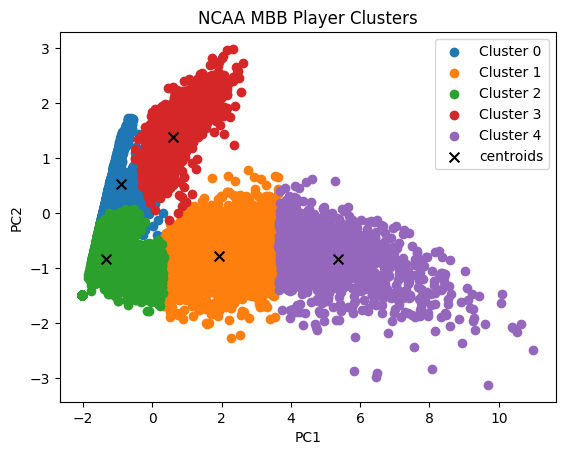

In [246]:
# plot the clusters found in the pca_data 
unique_labels = np.unique(clusters)
for label in unique_labels:
    plt.scatter(pca_data[clusters == label, 0], pca_data[clusters == label, 1], label = f'Cluster {label}')
    
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], s =50, c = 'black', marker = 'x', label = 'centroids')
plt.title('NCAA MBB Player Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [247]:
# add the clusters back to our original dataset
ncaa_players.loc[:, 'cluster'] = clusters
ncaa_players.head()

,role,number,player,ht,wt,yr,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,category,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,group_rank,team,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,transfer,prev_team,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,team_display_name,cluster
0,Major Contributor,2.0,Julian Champagnie,6-8,215.0,Jr,31.0,82.5,105.4,25.5,30.3,47.5,50.7,4.1,10.9,10.9,9.2,3.5,3.1,1.8,4.0,21.4,89.0,114.0,0.781,156.0,341.0,0.457,65.0,193.0,0.337,All Games,19.0,NaN,299.0,8.0,NaN,NaN,NaN,NaN,NaN,45.0,302.0,169.0,11.0,NaN,NaN,406.0,NaN,NaN,National Rank,St. John's,2022,45689.0,7.7,-5.6,-0.4,0.9,-3.7,-5.7,-1.2,3.0,3.0,-2.8,0.3,0.7,-0.3,-0.6,-8.6,-0.106,-0.014,-0.043,False,St. John's,1.297371,3.729506,5.026877,24.906250,797.0,34.218750,1095.0,32.0,32.0,2599.0,St. John's Red Storm,3
1,Significant Contributor,0.0,Posh Alexander,6-0,200.0,So,29.0,71.8,113.4,23.2,20.0,52.0,55.7,8.5,29.0,29.3,17.5,0.6,3.9,2.1,4.1,35.2,80.0,108.0,0.741,140.0,247.0,0.567,13.0,60.0,0.217,All Games,NaN,348.0,NaN,NaN,NaN,466.0,333.0,NaN,8.0,NaN,NaN,44.0,27.0,49.0,381.0,NaN,316.0,NaN,National Rank,St. John's,2022,49928.0,0.8,9.8,2.9,0.8,2.4,3.7,3.5,5.0,5.2,-2.4,0.5,-0.6,-0.8,1.3,13.8,0.016,0.052,-0.082,False,St. John's,1.105729,3.283223,4.388952,23.966667,719.0,32.000000,960.0,26.0,30.0,2599.0,St. John's Red Storm,3
2,Significant Contributor,5.0,Dylan AddaeWusu,6-4,235.0,So,32.0,61.0,101.5,20.3,17.3,51.1,52.6,3.9,25.5,25.5,22.6,0.9,2.8,3.6,3.3,29.2,40.0,66.0,0.606,60.0,129.0,0.465,37.0,97.0,0.381,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.0,NaN,NaN,267.0,NaN,NaN,NaN,NaN,NaN,321.0,National Rank,St. John's,2022,50232.0,10.9,6.3,0.3,0.6,1.1,0.6,-1.5,6.5,5.8,-3.0,0.3,0.6,-1.7,0.1,-3.0,-0.011,-0.098,0.110,False,St. John's,0.495921,2.298377,2.794298,15.575758,514.0,25.090909,828.0,16.0,33.0,2599.0,St. John's Red Storm,3
3,Role Player,23.0,Montez Mathis,6-4,210.0,Sr,32.0,60.5,98.3,18.5,18.9,44.9,47.3,4.5,12.6,12.6,14.2,0.8,2.4,3.7,3.3,28.2,43.0,69.0,0.623,89.0,192.0,0.464,14.0,53.0,0.264,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National Rank,St. John's,2022,42323.0,8.1,6.7,-5.2,-6.7,1.7,1.9,-0.9,5.4,5.4,1.6,-0.7,0.5,-0.8,-0.9,-2.4,0.049,0.038,-0.033,True,Rutgers,0.831166,2.265116,3.096283,13.937500,446.0,24.468750,783.0,28.0,32.0,2599.0,St. John's Red Storm,3
4,Role Player,1.0,Aaron Wheeler,6-9,205.0,Sr,31.0,53.0,110.1,19.7,21.4,56.8,57.9,4.2,11.3,11.3,14.8,4.7,1.3,4.2,3.1,22.2,35.0,54.0,0.648,75.0,134.0,0.560,42.0,109.0,0.385,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN,356.0,284.0,National Rank,St. John's,2022,40047.0,7.5,13.1,5.7,7.6,9.3,9.2,-1.5,1.1,1.1,-6.9,1.4,-0.7,0.1,0.8,-0.8,0.083,-0.051,0.119,True,Purdue,0.685434,1.934768,2.620202,13.500000,405.0,22.733333,682.0,16.0,30.0,2599.0,St. John's Red Storm,3


In [248]:
# generate descriptive statistics for each cluster for comparison
clus_0 = ncaa_players[ncaa_players['cluster'] == 0]
clus_0.describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,4794.000000,4722.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,490.000000,737.000000,500.000000,517.000000,553.000000,539.000000,787.000000,702.000000,551.000000,726.000000,807.000000,645.000000,640.000000,536.000000,502.000000,517.000000,747.000000,680.000000,4794.000000,4794.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.000000,4794.0
mean,12.942011,202.937103,28.047142,49.959554,102.906300,18.182207,18.425532,50.182582,53.026575,4.962933,11.139174,11.211306,17.489529,1.905111,1.793158,3.557322,3.079599,32.093659,39.067167,54.607843,0.698434,53.854401,106.664372,0.493699,22.639549,66.714435,0.285269,228.224490,220.850746,230.494000,232.750484,225.010850,224.272727,228.186785,232.796296,234.430127,219.041322,222.897150,230.336434,226.896875,230.955224,225.278884,222.698259,218.107095,226.504412,2023.396537,49605.403421,7.422213,4.096852,0.097689,0.281889,1.193414,1.387146,-0.135586,0.406326,0.400693,-1.457019,0.016724,-0.004564,-0.269526,0.006210,-0.122530,0.032278,0.008655,0.011912,0.150463,0.377771,0.528234,4.863902,126.790363,23.130333,541.676679,13.477055,23.140801,1682.438673,0.0
std,12.264539,22.857693,5.980379,18.185965,12.208131,4.656960,5.324449,7.464432,6.712689,3.543262,6.571024,6.638826,5.471961,2.123156,0.795666,1.237591,1.088612,16.503115,32.027386,41.529597,0.135765,39.225100,73.183442,0.095286,21.023226,56.003696,0.133838,152.398045,153.675457,153.670619,153.835717,155.249588,153.528093,154.201429,154.327495,154.632497,152.867636,153.519353,152.126000,153.291529,156.231071,154.264522,154.905091,153.673994,151.463805,0.804896,3967.336751,23.501979,14.393794,4.019311,4.549167,9.725623,8.844533,2.277669,4.862476,4.889092,6.133120,1.377048,0.811729,1.174879,0.987055,17.547395,0.180439,0.120404,0.154277,0.209532,0.472768,0.662224,3.426830,108.381570,5.632096,246.693108,10.201455,8.261251,5883.220558,0.0
min,0.000000,140.000000,3.000000,3.100000,36.900000,5.300000,3.600000,13.300000,13.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,31085.000000,-76.100000,-69.300000,-17.200000,-23.500000,-61.500000,-63.000000,-16.400000,-26.300000,-26.300000,-46.300000,-25.000000,-6.600000,-9.600000,-4.400000,-274.700000,-0.879000,-0.653000,-0.999000,0.000000,0.000000,0.000000,1.000000,4.000000,14.000000,62.000000,0.000000,4.000000,2.000000,0.0
25%,3.000000,185.000000,26.000000,37.500000,95.400000,14.900000,14.700000,45.500000,48.90000

In [249]:
clus_1 = ncaa_players[ncaa_players['cluster'] == 1]
clus_1.describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,1898.000000,1862.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,41.000000,266.000000,35.000000,40.000000,161.000000,150.000000,281.000000,220.000000,101.000000,238.000000,279.000000,194.000000,149.000000,92.000000,95.000000,93.000000,277.000000,216.000000,1898.0,1898.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.0
mean,13.309800,206.430720,27.555321,41.609168,104.905532,17.198999,17.251370,50.867492,53.497629,5.744626,10.162908,10.233667,17.290885,2.176027,1.816807,3.903741,2.942677,34.252845,29.554268,42.483667,0.685310,40.569020,77.491043,0.507405,18.498419,54.636459,0.272741,254.829268,202.639098,241.457143,272.775000,200.310559,196.886667,219.555160,228.627273,256.029703,219.617647,218.229391,221.041237,248.302013,221.478261,217.726316,235.784946,206.036101,215.856481,2025.0,53460.368809,4.266966,3.638010,-0.489967,-0.314274,1.177488,1.166069,0.103263,0.394780,0.397961,-0.685644,-0.045024,0.073980,-0.218597,-0.086868,-1.120799,0.031397,0.009350,0.011711,4.525030,4.061833,8.586863,11.163706,307.911486,19.118858,527.671760,11.965227,26.790832,1631.346154,1.0
std,13.025012,23.523715,6.782590,17.537408,13.510678,3.838105,4.648193,8.518205,7.557173,3.894518,5.742136,5.814930,5.860447,2.341005,0.867194,1.380507,1.008510,18.733008,21.330357,28.912826,0.143809,28.420681,48.359271,0.105553,18.589573,48.958252,0.146478,146.005976,146.195957,159.297787,158.014846,154.088580,159.256179,155.693878,148.907765,145.814297,156.596665,154.654143,154.061082,151.271088,148.010579,162.388976,154.638207,149.190711,149.943005,0.0,2842.019402,23.939650,15.660618,4.233608,4.740428,10.474323,9.539375,2.570855,4.893094,4.903094,6.562805,1.545964,0.854052,1.332255,1.029745,21.081635,0.194973,0.128963,0.171811,1.127448,1.039834,2.147757,3.195367,133.155984,5.737439,231.708925,11.040867,6.971437,5805.237442,0.0
min,0.000000,145.000000,3.000000,2.000000,37.200000,5.700000,2.800000,12.500000,13.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2025.0,42359.000000,-81.400000,-88.500000,-15.600000,-20.100000,-69.200000,-49.400000,-10.800000,-19.000000,-19.000000,-50.200000,-11.300000,-4.000000,-11.000000,-4.700000,-328.800000,-0.833000,-0.666000,-0.999000,2.190975,1.951843,4.252084,4.142857,17.000000,5.307692,30.000000,0.000000,4.000000,2.000000,1.0
25%,4.000000,190.000000,25.000000,28.700000,97.025000,14.600000,14.100000,45.600000,48.800000,2.500000,6.100000,6.

In [250]:
clus_2 = ncaa_players[ncaa_players['cluster'] == 2]
clus_2.describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,5672.000000,5498.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,5672.000000,80.000000,53.000000,88.000000,73.000000,53.000000,58.000000,69.000000,62.000000,91.000000,69.000000,79.000000,90.000000,87.000000,87.000000,88.000000,78.000000,56.000000,68.000000,5672.000000,5672.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,2669.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,4385.000000,5672.0
mean,15.562412,206.537832,20.110719,17.123960,92.886812,16.440215,15.841097,45.926763,48.266502,5.914880,8.182828,8.237306,20.670469,2.235208,1.645222,4.708727,2.804972,37.271862,10.952221,16.639104,0.572553,16.256876,32.950987,0.465004,5.862130,19.115656,0.208499,237.675000,236.358491,219.488636,213.630137,240.396226,268.724138,211.985507,259.725806,241.626374,260.666667,232.506329,243.433333,226.540230,242.080460,245.738636,232.538462,225.928571,229.117647,2023.325987,50901.695874,-8.571637,0.202136,-0.570026,-0.685088,-0.737467,-0.588123,0.094342,-0.218321,-0.215549,-0.141963,0.036531,0.051293,0.169164,-0.139678,1.068827,-0.011374,-0.008084,-0.005394,0.457154,0.622651,1.079805,4.170530,77.013683,9.961810,169.556214,1.275713,16.132497,1602.749601,2.0
std,12.735857,25.261070,8.475139,15.353339,20.618500,4.931639,6.237604,14.413467,12.767067,4.592808,6.193685,6.263886,9.853396,2.744885,1.160654,2.166335,1.250250,43.657000,16.717639,22.569840,0.272116,21.377112,41.964563,0.182951,10.340885,29.402287,0.188565,152.593261,151.280190,147.826008,166.719534,154.505208,146.377162,152.777952,164.996291,150.065071,164.722375,145.455242,172.979901,151.549271,135.044284,166.278018,160.412269,164.006303,167.098820,1.084041,4000.517590,22.707506,23.565886,4.623282,5.302852,16.815947,15.104291,3.724987,5.643101,5.685660,10.727825,2.271708,1.233796,2.010631,1.331395,46.169469,0.320812,0.206439,0.210081,0.679391,0.559306,1.211075,1.918213,62.191801,3.134772,115.249155,2.739265,8.318561,5417.216427,0.0
min,0.000000,140.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,7.000000,4.000000,13.000000,1.000000,3.000000,2.000000,2.000000,2.000000,5.000000,2.000000,5.000000,2.000000,4.000000,5.000000,1.000000,2022.000000,30428.000000,-85.800000,-112.500000,-21.400000,-27.400000,-85.700000,-67.300000,-20.900000,-25.200000,-26.100000,-50.700000,-17.400000,-8.700000,-11.700000,-11.700000,-586.700000,-0.999000,-0.999000,-0.999000,0.000000,0.000000,0.000000,1.000000,4.000000,1.250000,5.000000,0.000000,4.000000,2.000000,2.0
25%,4.000000,186.000000,13.000000,6.000000,81.500000,13.100000,11.600000,38.000000,41.300000,2.400000,4.00000

In [251]:
clus_3 = ncaa_players[ncaa_players['cluster'] == 3]
clus_3.describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,3351.000000,3291.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,953.000000,727.000000,941.000000,936.000000,911.000000,918.000000,664.00000,755.000000,882.000000,732.000000,637.000000,785.000000,797.000000,895.000000,932.000000,933.000000,717.000000,772.000000,3351.000000,3351.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.000000,2766.00000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.000000,3351.0
mean,11.871680,201.528715,28.623993,65.903909,103.945360,21.695673,22.145270,50.514682,53.892331,4.620292,14.665831,14.761265,17.226708,1.667323,1.963265,3.061474,3.689585,32.282214,61.041182,82.645181,0.734489,82.813787,165.763653,0.491725,33.315428,96.239928,0.310017,226.097587,232.287483,225.892667,224.038462,226.486279,226.630719,228.63253,221.104636,220.824263,233.816940,232.299843,224.875159,227.678795,225.143017,226.041845,227.594855,234.502092,227.685233,2022.520740,46610.193077,10.545517,2.722343,1.270499,1.485828,0.785973,0.987636,-0.118980,1.221511,1.224403,-1.070282,-0.002097,0.029248,-0.335249,0.194758,-0.002495,0.021770,0.002546,0.01749,0.558718,1.778832,2.337549,16.828715,499.597434,28.620835,851.256043,25.199343,29.544614,1763.228588,3.0
std,12.087724,23.426273,5.688696,15.931975,9.935777,4.209662,4.757327,6.002693,5.435586,3.457902,7.333427,7.390769,4.433513,1.983322,0.810426,0.930222,1.059294,13.361488,32.706275,41.801661,0.100438,42.126539,75.610611,0.074792,24.616107,64.639236,0.113309,152.895767,152.635411,152.949095,152.105067,151.838910,152.347941,151.93256,151.446950,151.768798,151.696117,153.975840,151.738235,152.894361,152.620898,152.180540,152.652221,151.720281,154.368882,0.532611,4089.494679,22.628141,11.617088,4.145952,4.589721,7.647561,7.087939,1.909793,5.292133,5.288702,4.732148,1.232770,0.760328,0.919850,1.011349,13.446995,0.122663,0.087781,0.13437,0.255902,0.568927,0.715831,4.204623,167.062962,4.135976,221.657674,8.986538,5.878092,6728.512066,0.0
min,0.000000,140.000000,1.000000,2.200000,38.200000,10.000000,7.000000,0.000000,14.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,30967.000000,-76.800000,-67.800000,-18.000000,-20.200000,-55.400000,-54.600000,-11.200000,-21.400000,-21.400000,-29.300000,-9.800000,-5.500000,-7.500000,-5.200000,-221.300000,-0.550000,-0.544000,-0.99900,0.039439,0.054907,0.115669,9.535714,48.000000,16.500000,66.000000,0.000000,4.000000,2.000000,3.0
25%,2.000000,185.000000,27.000000,57.850000,97.700000,18.600000,18.800000,46.600000,50.300000,1.9000

In [252]:
clus_4 = ncaa_players[ncaa_players['cluster'] == 4]
clus_4.describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,1169.000000,1146.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,423.000000,207.000000,426.000000,422.000000,314.000000,328.000000,192.000000,251.000000,359.000000,220.000000,190.000000,267.000000,319.000000,379.000000,373.000000,372.000000,201.000000,249.000000,1169.0,1169.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.000000,1169.0
mean,10.049615,200.570681,29.491018,68.248075,106.741660,22.878956,23.401540,50.655432,54.375791,4.511121,15.892387,15.997605,16.182720,1.597092,2.061249,2.954234,3.899743,34.888109,74.430282,99.692900,0.746235,92.897348,184.710009,0.494977,37.744226,109.635586,0.317718,222.791962,261.198068,227.180751,225.670616,243.490446,242.143293,232.036458,216.693227,219.178273,231.445455,238.989474,224.659176,214.808777,222.437995,228.544236,228.115591,264.313433,233.305221,2025.0,52604.074423,15.075748,3.625000,1.919124,2.142094,1.052564,1.335897,0.025641,2.197650,2.205769,-0.944338,-0.005556,0.119231,-0.391880,0.356517,1.118697,0.028950,0.005912,0.018356,8.761475,8.043187,16.804662,20.094203,591.512404,29.227577,859.409752,25.302823,29.257485,1729.325920,4.0
std,11.460815,22.827257,5.175363,14.995861,9.304391,3.886079,4.473338,5.683322,5.119260,3.282967,7.598867,7.654836,4.192532,1.748573,0.810914,0.922429,1.160800,19.441279,36.326508,46.632055,0.095582,42.867845,76.161074,0.071518,25.520347,66.699751,0.099325,154.094678,154.939056,153.888845,151.674840,151.172209,150.149714,150.333708,153.555637,154.755264,149.211296,149.347611,151.975265,153.241222,155.851487,148.580492,151.508551,148.378861,150.383016,0.0,2906.918838,23.615402,11.124384,4.269194,4.734583,7.396461,6.826044,1.817669,5.376675,5.381987,4.802777,1.044185,0.725556,1.012583,1.076079,19.560608,0.130229,0.086121,0.121320,1.796474,1.663365,3.433344,3.915389,164.473647,4.122158,203.768950,8.493591,5.187536,5727.008106,0.0
min,0.000000,155.000000,3.000000,2.100000,72.600000,12.300000,5.900000,31.100000,36.000000,0.000000,0.000000,0.000000,5.300000,0.000000,0.000000,0.900000,1.400000,5.400000,2.000000,4.000000,0.328000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2025.0,42105.000000,-63.900000,-50.500000,-13.700000,-17.300000,-38.700000,-36.700000,-7.700000,-22.300000,-22.300000,-31.600000,-5.900000,-3.000000,-5.400000,-3.700000,-143.900000,-0.413000,-0.375000,-0.749000,5.803713,5.249665,11.053378,10.500000,42.000000,16.391304,88.000000,0.000000,4.000000,2.000000,4.0
25%,2.000000,185.000000,28.000000,61.600000,101.000000,20.200000,20.200000,46.800000,50.900000,1.900000,10.100000,10.200000,13.3

In [253]:
# extract the most common player roles found in each cluster
clusters = [clus_0, clus_1, clus_2, clus_3, clus_4]
labels = [0,1,2,3,4]

for cluster, label in zip(clusters, labels):
    roles_vc = cluster['role'].value_counts()[:2]

    role = roles_vc.index.tolist()
    occurances = roles_vc.values.tolist()
    
    print(f'The two most common roles in cluster {label} are {role[0], role[1]} with {occurances[0]} and {occurances[1]} occurances, respectively.')

The two most common roles in cluster 0 are ('Role Player', 'Limited Role') with 1601 and 1291 occurances, respectively.
The two most common roles in cluster 1 are ('Role Player', 'Limited Role') with 723 and 583 occurances, respectively.
The two most common roles in cluster 2 are ('Benchwarmer', 'Limited Role') with 2254 and 1193 occurances, respectively.
The two most common roles in cluster 3 are ('Significant Contributor', 'Role Player') with 1175 and 948 occurances, respectively.
The two most common roles in cluster 4 are ('Significant Contributor', 'Major Contributor') with 492 and 298 occurances, respectively.


In [254]:
# sort dataset by player & year
sorted_ncaa = ncaa_players.sort_values(by = ['player', 'year'])
sorted_ncaa.head(10)

,role,number,player,ht,wt,yr,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,category,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,group_rank,team,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,transfer,prev_team,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,team_display_name,cluster
8988,Significant Contributor,10.0,AC Bryant,6-3,185.0,So,35.0,27.5,86.2,23.9,26.9,35.9,42.8,4.7,9.9,9.9,16.9,0.9,2.6,6.4,4.8,44.4,45.0,63.0,0.714,45.0,116.0,0.388,4.0,26.0,0.154,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Alabama A&M,2024,55805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None,0.004196,0.000000,0.004196,1.333333,16.0,14.583333,175.0,3.0,12.0,2010.0,Alabama A&M Bulldogs,2
12969,Major Contributor,0.0,AC Bryant,6-3,185.0,Jr,28.0,59.7,115.7,24.4,27.4,54.9,57.9,5.7,16.0,16.0,12.0,0.5,3.2,3.4,5.4,45.8,88.0,130.0,0.677,84.0,166.0,0.506,48.0,118.0,0.407,All Games,NaN,465.0,405.0,217.0,NaN,NaN,NaN,NaN,NaN,379.0,NaN,209.0,NaN,132.0,NaN,NaN,NaN,161.0,National Rank,Alabama A&M,2025,55805.0,32.2,29.5,0.5,0.5,19.0,15.1,1.0,6.1,6.1,-4.9,-0.4,0.6,-3.0,0.6,1.4,-0.037,0.118,0.253,False,Alabama A&M,8.958543,7.911975,16.870518,20.076923,522.0,23.846154,620.0,22.0,26.0,2010.0,Alabama A&M Bulldogs,4
4932,Nearly Invisible,24.0,AC Curry,6-5,190.0,Jr,27.0,49.9,88.5,11.8,14.5,42.3,41.7,7.7,4.3,4.3,16.0,3.2,2.6,4.0,1.1,2.7,0.0,3.0,0.000,18.0,33.0,0.545,19.0,77.0,0.247,All Games,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,334.0,364.0,NaN,NaN,NaN,NaN,NaN,NaN,National Rank,Arkansas Pine Bluff,2023,53463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None,0.393596,0.639308,1.032904,7.178571,201.0,19.928571,558.0,18.0,28.0,2029.0,Arkansas-Pine Bluff Golden Lions,0
10772,Limited Role,34.0,AD Diedhiou,6-11,250.0,Jr,27.0,41.5,85.1,12.6,10.9,36.5,36.0,10.4,8.0,8.0,17.9,3.3,1.6,5.0,2.6,46.0,11.0,34.0,0.324,27.0,74.0,0.365,0.0,0.0,0.000,All Games,NaN,NaN,NaN,NaN,NaN,NaN,193.0,NaN,NaN,NaN,345.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National Rank,Louisiana Monroe,2024,51971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None,0.029231,0.000000,0.029231,1.769231,23.0,20.461538,266.0,10.0,13.0,2433.0,UL Monroe Warhawks,0
14468,Nearly Invisible,34.0,AD Diedhiou,6-11,250.0,Sr,30.0,45.3,110.0,10.3,8.5,48.5,51.7,8.5,9.9,9.9,16.7,3.5,1.3,4.6,2.0,44.1,19.0,30.0,0.633,33.0,68.0,0.485,0.0,0.0,0.000,All Games,NaN,NaN,NaN,NaN,NaN,NaN,392.0,NaN,NaN,NaN,359.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,National Rank,Louisiana Monroe,2025,51971.0,3.8,24.9,-2.3,-2.4,12.0,15.7,-1.9,1.9,1.9,-1.2,0.2,-0.3,-0.4,-0.6,-1.9,0.309,0.120,0.000,False,Louisiana Monroe,3.319165,2.887190,6.206356,7.222222,195.0,18.629630,503.0,5.0,27.0,2433.0,UL Monroe Warhawks,1
1079,Role Player,55.0,AJ Allenspach,6-8,225.0,Fr,15.0,10.7,79.7,16.0,12.2,36.4,36.1,14.1,5.7,5.7,23.1,3.7,0.5,4.8,3.3,54.5,4.0,12.0,0.333,8.0,22.0,0.364,0.0,0.0,0.000,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Army,2022,51725.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,None,0.140819,0.348642,0.489461,5.076923,66.0,9.923077,129.0,0.0,13.0,349.0,Army Black Knights,2
5660,Benchwarmer,55.0,AJ Allenspach,6-8,225.0,So,7.0,3.1,78.4,12.6,9.4,40.0,40.0,13.4,4.3,4.3,36.0,0.0,0.0,7.2,1.0,0.0,0.0,0.0,0.000,2.0,5.0,0.400,0.0,0.0,0.000,All Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [255]:
# number of players in each respective role
sorted_ncaa['role'].value_counts()

role
Role Player                4590
Significant Contributor    3398
Limited Role               3335
Benchwarmer                2399
Major Contributor          1628
Nearly Invisible            955
Go-to Guys                  579
Name: count, dtype: int64

In [256]:
# descriptive statistics for some of the roles found in the dataset
sorted_ncaa.loc[sorted_ncaa['role'] == 'Role Player',:].describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,4590.000000,4511.000000,4590.000000,4590.00000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,428.000000,650.000000,0.0,18.000000,607.000000,559.000000,666.000000,554.000000,371.000000,650.000000,619.000000,546.000000,596.000000,126.000000,455.000000,394.000000,704.000000,650.000000,4590.000000,4590.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4590.000000
mean,12.879303,203.909111,28.032680,47.05658,101.948824,17.932484,18.103442,49.943987,52.707211,5.304139,10.617974,10.698671,17.964466,1.975839,1.802418,3.710414,2.999935,32.107407,33.264706,47.082353,0.695121,47.352723,93.325272,0.492642,21.596514,63.628976,0.275832,245.733645,218.513846,NaN,393.000000,218.321252,215.348837,237.843844,238.648014,256.665768,218.230769,225.649435,240.752747,235.558725,313.738095,246.294505,226.743655,223.149148,218.776923,2023.487364,49895.911111,6.806119,3.290712,-0.189834,-0.013398,0.948572,1.072388,-0.020929,0.242642,0.245121,-1.055977,-0.011453,0.030248,-0.226922,-0.071980,-0.578255,0.032503,0.004940,0.010986,1.440899,1.685269,3.126168,8.751386,246.745425,21.400951,560.189616,13.912397,25.314959,1635.851327,1.454684
std,12.229493,22.962694,5.648587,20.95037,12.733891,1.138353,2.826815,7.756512,7.032544,3.760670,5.858566,5.939471,5.755890,2.176596,0.803366,1.438684,0.727124,16.373175,21.623441,28.472781,0.133920,30.032734,52.175345,0.094930,21.142858,55.908178,0.138130,149.727368,149.494827,NaN,135.235742,152.145321,151.186366,155.899697,155.742336,154.628050,151.899445,153.252710,156.508871,153.090290,151.636733,151.663148,152.519428,156.139929,156.283910,1.117305,4399.178916,23.333313,14.559686,3.802062,4.345763,9.741121,8.908293,2.360626,4.755106,4.780081,6.297035,1.495997,0.848618,1.256550,0.982261,16.677434,0.181790,0.114321,0.155311,2.269009,1.944499,4.184267,5.151868,174.821349,7.209773,285.950694,11.864767,7.900365,5678.491593,1.291816
min,0.000000,140.000000,5.000000,10.00000,49.200000,16.000000,7.700000,18.500000,23.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,46.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,30727.000000,-74.500000,-59.600000,-18.700000,-27.400000,-49.400000,-45.500000,-18.600000,-25.200000,-26.100000,-46.100000,-25.000000,-6.600000,-9.100000,-11.700000,-142.900000,-0.799000,-0.666000,-0.999000,0.000000,0.000000,0.000000,1.000000,4.000000,4.375000,31.000000,0.000000,4.000000,2.000000,0.000000
25%,3.000000,185.000000,26.000000,29.20000,94.000000,16.900000,16.200000,45.100000,48.400000,2.200

In [257]:
sorted_ncaa.loc[sorted_ncaa['role'] == 'Significant Contributor',:].describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,3398.000000,3339.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,3398.000000,675.000000,502.000000,142.000000,527.000000,627.000000,644.000000,565.000000,630.000000,636.000000,523.000000,575.000000,594.000000,584.000000,645.000000,657.000000,753.000000,553.000000,566.000000,3398.000000,3398.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3269.000000,3398.000000
mean,12.133608,204.130578,28.285168,55.704679,102.639612,21.791701,22.155768,49.987139,53.300059,5.100177,13.430577,13.523514,17.441789,1.877899,1.902001,3.476045,3.695880,33.820924,53.395232,73.324014,0.718717,72.099765,143.917304,0.491423,28.111242,82.100353,0.292780,235.840000,255.484064,430.802817,316.889943,236.944179,237.380435,219.561062,225.684127,232.209119,247.936902,234.001739,223.245791,227.582192,277.941085,224.762557,228.940239,241.047016,233.773852,2023.500589,49533.663331,7.762923,2.880327,1.295858,1.538988,0.750896,1.008562,-0.008682,1.034249,1.038351,-1.101792,-0.032577,0.047431,-0.268777,0.211629,0.622899,0.022867,0.003146,0.015888,2.011669,2.373921,4.385590,12.043180,347.308045,24.807774,680.548792,18.606302,26.743041,1645.123585,1.978517
std,12.293479,25.017005,5.790745,21.230760,10.985696,1.149508,2.838650,6.394965,5.837090,3.721587,6.937494,7.012068,4.833372,2.011485,0.829193,1.293419,0.822584,14.542258,30.184733,38.983592,0.111599,37.608613,66.922324,0.076808,24.518969,64.975829,0.128158,151.612954,147.381316,141.413946,137.571576,150.884607,151.841490,153.140164,150.405600,152.068039,153.821991,150.332935,150.260831,150.068767,142.279271,151.348446,154.139549,151.080221,148.055628,1.125807,4492.520854,23.557858,11.974494,3.755061,4.330923,7.833339,7.227944,2.139292,5.180721,5.180890,5.156364,1.274496,0.801090,1.120016,0.981928,14.263533,0.135836,0.087463,0.149259,3.094728,2.653668,5.710054,6.791161,226.918243,7.157634,292.223613,11.908519,7.220266,5601.540459,1.464669
min,0.000000,140.000000,4.000000,10.000000,55.100000,20.000000,12.500000,16.100000,25.900000,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,1.000000,1.500000,3.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,30967.000000,-70.900000,-57.300000,-13.300000,-12.800000,-55.400000,-54.600000,-13.000000,-26.300000,-26.100000,-46.300000,-11.300000,-5.800000,-11.000000,-3.100000,-221.300000,-0.860000,-0.540000,-0.999000,0.000000,0.000000,0.000000,1.000000,4.000000,5.500000,28.000000,0.000000,4.000000,2.000000,0.000000
25%,3.000000,185.000000,26.000000,40.200000,96.025000,20.800000,20.20

In [258]:
sorted_ncaa.loc[sorted_ncaa['role'] == 'Major Contributor',:].describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,1628.000000,1598.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,524.000000,229.000000,1336.000000,941.000000,320.000000,364.000000,278.000000,382.000000,566.000000,244.000000,281.000000,397.000000,328.000000,767.000000,479.000000,571.000000,254.000000,280.000000,1628.000000,1628.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1628.000000
mean,11.532555,202.977472,28.118550,61.827334,103.342998,25.650799,25.846253,49.898649,53.797973,5.030467,16.908231,16.999693,17.230774,1.773771,2.072482,3.291278,4.442752,36.170025,76.308968,102.055897,0.739639,98.359951,197.888206,0.491509,31.907862,93.697789,0.302326,216.274809,267.921397,270.215569,237.614240,243.878125,244.513736,214.996403,207.238220,215.167845,258.692623,242.911032,214.788413,221.798780,218.238592,226.031315,221.490368,253.972441,234.500000,2023.483415,49379.413391,10.630151,2.985680,2.785282,2.916070,0.672951,1.085919,-0.050915,2.421718,2.425378,-1.198488,0.008433,0.070326,-0.351551,0.514797,1.491090,0.024866,0.003818,0.017017,2.375719,2.884338,5.260057,15.144904,438.377663,27.340643,767.872176,21.717883,27.427372,1710.000000,2.257371
std,12.066637,26.130341,5.914891,20.840037,9.679446,1.106707,2.834664,5.764210,5.187028,3.769958,7.709422,7.753949,4.295881,1.983765,0.860121,1.201238,0.893604,13.601061,38.148560,47.820770,0.099154,44.312054,80.820742,0.068475,25.454253,68.115503,0.116684,154.316072,156.013672,122.800596,139.800652,146.931138,149.189075,154.193102,150.769307,149.193306,151.596225,151.158795,147.936038,152.689054,148.985338,152.173146,153.341362,144.652108,151.011452,1.116054,4452.688174,24.108522,10.684051,4.105189,4.696263,7.095422,6.528437,2.140503,5.643892,5.647156,4.646743,1.240489,0.765760,1.037636,1.086133,13.507013,0.115582,0.079820,0.150706,3.712766,3.135093,6.794605,8.378331,277.376087,6.725981,289.562178,11.286832,6.831257,6400.182479,1.452624
min,0.000000,145.000000,5.000000,10.000000,59.500000,24.000000,15.300000,26.100000,27.900000,0.000000,0.700000,0.700000,3.800000,0.000000,0.000000,0.800000,1.900000,3.300000,1.000000,2.000000,0.286000,3.000000,13.000000,0.182000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2022.000000,38051.000000,-74.300000,-39.500000,-13.800000,-16.700000,-37.600000,-25.900000,-12.600000,-21.000000,-21.000000,-29.300000,-9.800000,-4.700000,-6.000000,-4.800000,-143.900000,-0.357000,-0.381000,-0.999000,0.000000,0.000000,0.000780,1.000000,4.000000,4.200000,21.000000,0.000000,4.000000,2.000000,0.000000
25%,2.000000,185.000000,26.000000,49.400000,97.400000,24.700000,24.00

In [259]:
sorted_ncaa.loc[sorted_ncaa['role'] == 'Go-to Guys',:].describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,579.000000,572.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,231.000000,82.000000,512.000000,502.000000,108.000000,138.000000,118.000000,174.000000,306.000000,85.000000,115.000000,181.000000,144.000000,445.000000,243.000000,233.000000,100.000000,77.000000,579.000000,579.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.00000,459.000000,459.000000,459.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,579.000000
mean,10.880829,203.743007,27.892919,66.223834,103.407945,30.106908,30.312608,49.680311,53.905181,4.954577,20.348705,20.438342,16.792573,1.823661,2.198618,3.177202,5.326425,38.306218,101.119171,134.915371,0.743368,127.050086,254.086356,0.494988,34.642487,104.922280,0.302896,178.220779,265.524390,58.935547,107.770916,269.879630,261.188406,220.347458,187.155172,179.813725,280.564706,222.452174,195.690608,217.506944,140.024719,223.053498,232.776824,257.320000,279.038961,2023.481865,49306.511226,10.799782,2.054031,5.085621,5.142048,0.331373,0.954684,-0.222222,4.066885,4.057734,-1.035730,0.073203,0.116993,-0.323747,1.011329,2.81024,0.025684,0.000730,0.022033,2.717740,3.366412,6.084151,17.925206,518.969147,29.203248,810.905626,23.791289,27.147005,1622.430127,2.297064
std,11.520012,29.163505,5.927964,20.131936,9.057737,1.861666,3.251855,5.244241,4.724274,3.710482,8.159566,8.193861,3.704434,2.049139,0.914568,1.191405,1.054391,13.101604,46.239836,58.573954,0.091274,52.065529,92.755844,0.061400,26.381517,72.783766,0.093739,147.694098,162.516569,39.945581,109.367832,148.258471,158.815026,157.088650,152.224029,146.272308,139.518769,157.792905,152.732604,155.574460,129.702941,154.230726,150.136007,151.320509,148.577859,1.102498,4344.438204,23.055965,10.243149,4.565014,5.117552,6.189177,5.806317,2.069425,6.174238,6.184284,4.751096,1.148799,0.789045,0.972000,1.152935,13.42931,0.096592,0.068234,0.125014,4.480793,3.806639,8.220186,10.383931,338.547460,5.859153,285.764490,10.223413,7.199633,4862.171778,1.499080
min,0.000000,140.000000,4.000000,10.300000,70.900000,28.000000,19.000000,34.300000,41.000000,0.400000,3.600000,3.600000,7.100000,0.000000,0.000000,1.100000,2.300000,6.500000,3.000000,5.000000,0.345000,14.000000,30.000000,0.300000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2022.000000,38320.000000,-70.000000,-53.500000,-12.500000,-9.400000,-16.000000,-15.600000,-9.000000,-19.100000,-19.100000,-31.600000,-5.200000,-3.300000,-5.200000,-2.700000,-124.90000,-0.479000,-0.260000,-0.667000,0.000965,0.000000,0.000965,1.166667,5.000000,8.384615,41.000000,0.000000,4.000000,2.000000,0.000000
25%,2.000000,184.000000,26.000000,56.100000,97.750000,28.700000,28.200000,46.050000,50.850000,2.100000,13.950000,14.050000,14.300000,0

In [260]:
sorted_ncaa.loc[sorted_ncaa['role'] == 'Limited Role',:].describe()

,number,wt,g,min_pct,o_rtg,poss_pct,shots_pct,e_fg_pct,ts_pct,or_pct,dr_pct,a_rate,to_rate,blk_pct,stl_pct,f_cper40,f_dper40,ft_rate,ftm,fta,ft_pct,fgm_2,fga_2,fg_2_pct,fgm_3,fga_3,fg_3_pct,min_pct_rk,o_rtg_rk,poss_pct_rk,shots_pct_rk,e_fg_pct_rk,ts_pct_rk,or_pct_rk,dr_pct_rk,a_rate_rk,to_rate_rk,blk_pct_rk,stl_pct_rk,f_cper40_rk,f_dper40_rk,ft_rate_rk,ft_pct_rk,fg_2_pct_rk,fg_3_pct_rk,year,player_id,diff_min_pct,diff_o_rtg,diff_poss_pct,diff_shots_pct,diff_e_fg_pct,diff_ts_pct,diff_or_pct,diff_dr_pct,diff_a_rate,diff_to_rate,diff_blk_pct,diff_stl_pct,diff_f_cper40,diff_f_dper40,diff_ft_rate,diff_ft_pct,diff_fg_2_pct,diff_fg_3_pct,avg_in_deg,avg_out_deg,avg_total_deg,avg_possessions,total_possessions,avg_minutes,total_minutes,total_starts,total_games,team_id,cluster
count,3335.000000,3261.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,3335.000000,119.000000,435.000000,0.0,0.0,285.000000,252.000000,318.000000,224.000000,101.000000,415.000000,343.000000,227.000000,289.000000,6.000000,141.000000,42.000000,361.000000,361.000000,3335.000000,3335.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,2092.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3335.000000
mean,14.264468,204.196872,27.286957,38.769175,102.415802,14.198141,14.188276,50.252294,52.396702,5.279550,8.386087,8.438861,18.084288,2.098561,1.663718,3.925427,2.400780,31.271514,19.081559,28.219490,0.660384,27.924438,54.252174,0.497978,15.986207,47.032984,0.263899,250.731092,193.648276,NaN,NaN,193.459649,191.043651,222.952830,261.558036,296.287129,192.638554,206.469388,245.383260,216.830450,422.166667,185.446809,237.357143,189.324100,214.102493,2023.509745,50375.998201,4.473088,4.354063,-1.627916,-1.452390,1.527055,1.363337,-0.043547,-0.432935,-0.436520,-1.152247,0.065488,-0.013050,-0.148279,-0.329493,-2.283317,0.027439,0.011140,0.012439,1.105860,1.257066,2.362926,6.382419,170.934783,18.506034,450.856018,9.857278,23.365469,1797.586641,1.138231
std,12.596201,21.703606,5.570306,19.510369,14.248632,1.123828,2.746341,9.134274,8.154843,3.634018,4.776096,4.850312,6.634560,2.409493,0.803332,1.536712,0.646206,19.718152,14.219863,19.500614,0.171815,20.540806,34.725770,0.117186,17.560397,45.910147,0.154381,152.883455,149.656082,NaN,NaN,159.712713,153.638144,144.066212,146.917341,141.970514,148.283787,156.284878,157.143777,158.343099,43.453040,156.060218,167.032613,147.109625,155.281064,1.102083,4234.287546,23.510691,17.186600,3.460416,4.102118,11.549766,10.599234,2.553036,4.417093,4.448094,7.216317,1.544895,0.840081,1.362142,0.929075,23.988017,0.218896,0.147159,0.159036,1.726375,1.478345,3.184261,3.784372,129.373736,6.720658,261.932844,10.604014,8.337357,6619.149054,1.040176
min,0.000000,140.000000,5.000000,10.000000,37.800000,12.000000,5.300000,13.300000,14.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,362.000000,1.000000,1.000000,1.000000,1.000000,2022.000000,38024.000000,-81.500000,-88.500000,-17.200000,-20.200000,-40.800000,-40.100000,-14.400000,-26.300000,-26.300000,-50.200000,-11.300000,-4.700000,-9.600000,-8.900000,-328.800000,-0.999000,-0.595000,-0.999000,0.000000,0.000000,0.000000,1.000000,4.000000,5.391304,24.000000,0.000000,4.000000,2.000000,0.000000
25%,4.000000,190.000000,24.000000,21.700000,93.400000,13.300000,12.200000,44.650000,47.350000,2.200000,5.100000,5.100000,1